In [97]:
%matplotlib inline
import os
os.environ['PROJ_LIB'] = 'C:\\Users\\imdff\\Anaconda3\\Library\\share'

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


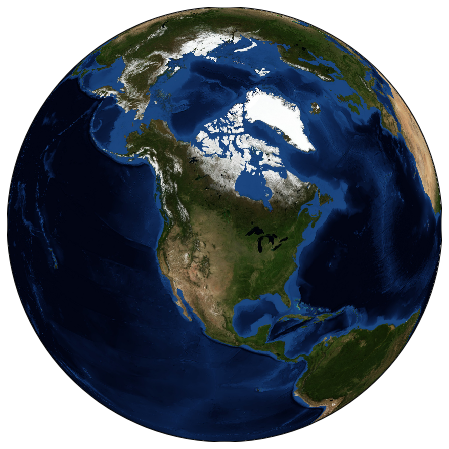

In [17]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


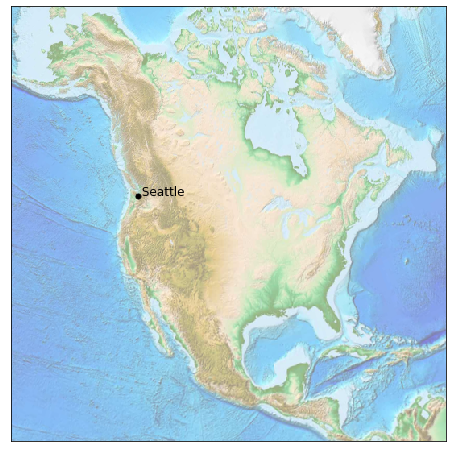

In [32]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

In [33]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
    
    # keys contain the plt.Line2D instance
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

## Cylindrical projections
- cylindrical projection - `cyl`
- cylindrical equal area - `cea`

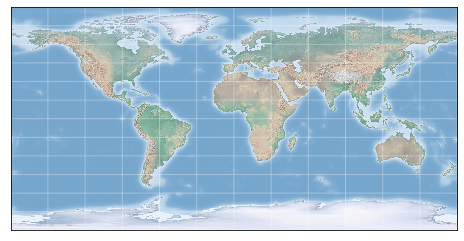

In [44]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,)
draw_map(m)

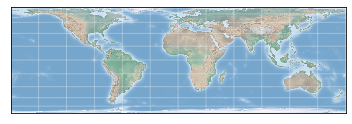

In [48]:
m = Basemap(projection='cea', resolution=None, lat_0=0, lon_0=0)
draw_map(m)

## Pesudo-cylindrical projections
- Mollweide projection - `moll`
- sinusoidal - `sinu`
- Robinson - `robin`

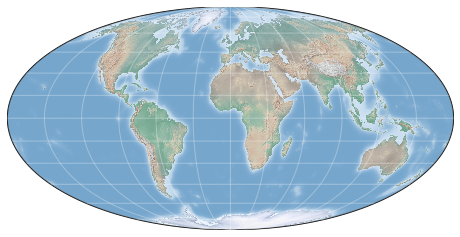

In [45]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None, lat_0=0, lon_0=0)
draw_map(m)

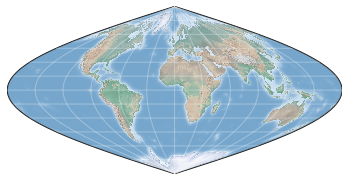

In [46]:
m = Basemap(projection='sinu', resolution=None, lat_0=0, lon_0=0)
draw_map(m)

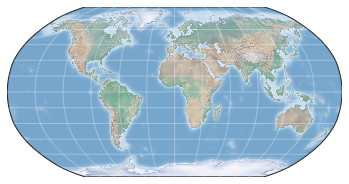

In [47]:
m = Basemap(projection='robin', resolution=None, lat_0=0, lon_0=0)
draw_map(m)

## Perspective projections
- orthographic - `ortho`

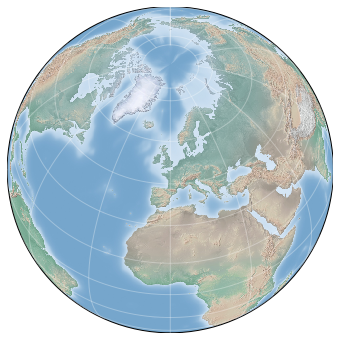

In [49]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=0)
draw_map(m)

## Conic projections
- projects the map onto a single cone
- Conformal Conic projection - `lcc`

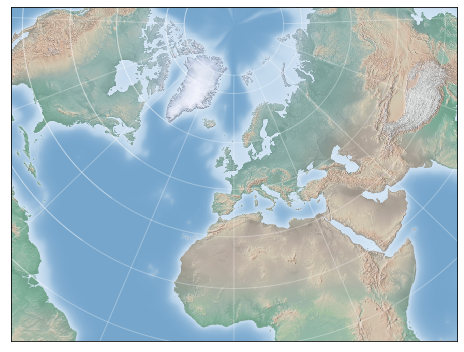

In [53]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, lon_0=0, lat_0=50, lat_1=45, lat_2=55, width=1.6E7, height=1.2E7)
draw_map(m)

# Drawing a Map Background
- resolution : level of detail in boundaries
    - None < `c`(crude) < `l`(low) < `i`(intermediate) < `h`(high) < `f`(full)

C:\Users\imdff\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


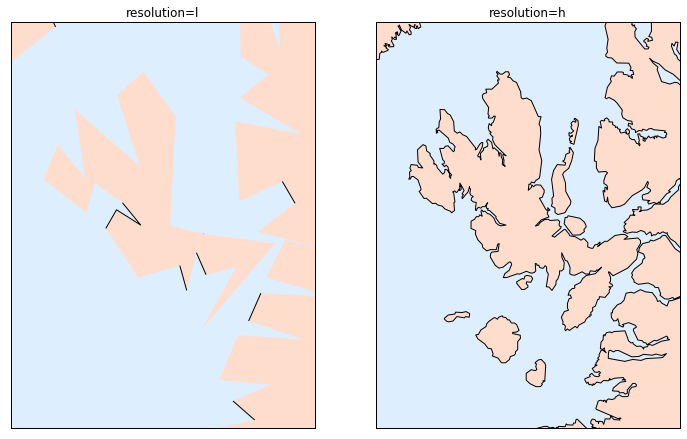

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2, width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color='#FFDDCC', lake_color='#DDEEFF')
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    ax[i].set_title('resolution={0}'.format(res))

# Plotting Data on Maps

# Example: California Cities

In [98]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [99]:
# Extract the data we're interested in
# lat = cities['latd'].values
# lon = cities['longd'].values
# population = cities['population_total'].values
# area = cities['area_total_km2'].values

# recommend to_numpy()
lat = cities['latd'].to_numpy()
lon = cities['longd'].to_numpy()
population = cities['population_total'].to_numpy()
area = cities['area_total_km2'].to_numpy()

In [100]:
# remove warning
from inspect import cleandoc as dedent

C:\Users\imdff\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\imdff\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\imdff\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


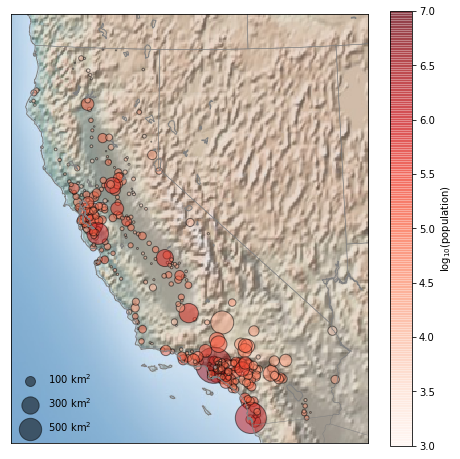

In [101]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True, c=np.log10(population), s=area, cmap='Reds', alpha=0.5, edgecolor='black')

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left');

# Example: Surface Temperature Data

[NASA's Goddard Institute for Space Studies](https://data.giss.nasa.gov/)

In [85]:
# !curl -O https://data.giss.nasa.gov/pub/gistemp/gistemp250_GHCNv4.nc.gz
# !gunzip gistemp250.nc.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   263  100   263    0     0    282      0 --:--:-- --:--:-- --:--:--   281


In [87]:
from netCDF4 import Dataset
data = Dataset('data/gistemp250_GHCNv4.nc')

In [92]:
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2019, 1, 15),
                       data.variables['time'])

In [93]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

C:\Users\imdff\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


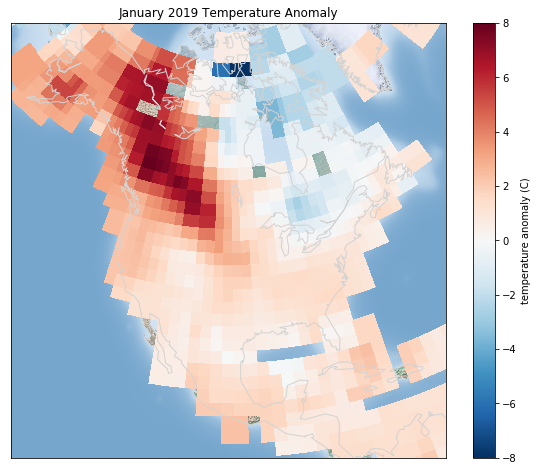

In [96]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c', width=8E6, height=8E6, lat_0=45, lon_0=-100,)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly, latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
m.drawcoastlines(color='lightgray')

plt.title('January 2019 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (C)')